# Анализ игровой индустрии

Интернет-магазин "Стримчик" продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Перед нами данные до 2016 года. Сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.

* `Name` - название игры
* `Platform` - платформа
* `Year_of_Release` - год выпуска
* `Genre` - жанр игры
* `NA_sales` - продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` - продажи в Европе (миллионы проданных копий)
* `JP_sales` - продажи в Японии (миллионы проданных копий)
* `Other_sales` - продажи в других странах (миллионы проданных копий)
* `Critic_Score` - оценка критиков (где 100 - максимальный рейтинг)
* `User_Score` - оценка пользователей (где 100 - максимальный рейтинг)
* `Rating` - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Цель исследования.**

Выявить характеристики, которые определяют успешность тех или иных игр, жанров игр и игровых приставок. Эта информация позволит выделить потенциально успешные продукты на популярные консоли и спланировать рекламные кампании.

Исследование пройдёт в шесть этапов:

1. Загрузка библиотек и обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Портрет пользователей по каждому из регионов.
5. Проверка гипотез. 
6. Общий вывод.

### Загрузка библиотек и обзор данных

In [1]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
import scipy.stats 
from scipy import stats as st
import math
from IPython.display import display_html

In [2]:
try:
    games_data = pd.read_csv('/datasets/games.csv')
except:
    games_data = pd.read_csv('/Users/irina/Documents/praktikum/csv/games.csv')

In [3]:
games_data[:15]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В информации о таблице мы видим, что есть пропуски данных, нарушение змеиного регистра и есть потребность привести к более удобному типу данных информацию в столбце User_Score.

### Предобработка данных

#### Приведение к нижнему регистру названий столбцов

In [5]:
games_data.columns = games_data.columns.str.lower()

In [6]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Отлично, все названия столбцов приведены к нижнему регистру, теперь с ними будет удобнее работать. 

#### Обработка пропусков

По информации выше можно понять, что у нас есть пропуски в нескольких столбцах: `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`. Заменим пропуски на подходящие по смыслу значения или отбросим их, но сначала посмотрим, какой процент пропусков у нас в каждом столбце:

In [7]:
na_ratio = pd.DataFrame(games_data.isna().mean()).reset_index()
na_ratio.set_axis(['column_name', 'na_ratio'], axis = 'columns', inplace = True)
na_ratio.sort_values(by='na_ratio', ascending=False).style.format({'na_ratio': '{:,.2%}'.format})

,column_name,na_ratio
8,critic_score,51.32%
10,rating,40.48%
9,user_score,40.09%
2,year_of_release,1.61%
0,name,0.01%
3,genre,0.01%
1,platform,0.00%
4,na_sales,0.00%
5,eu_sales,0.00%
6,jp_sales,0.00%


Только в столбцах `critic_score`, `rating` и `user_score` пропущенных значений больше 10%, в остальных столбцах от 1,6% и ниже, поэтому смело можно отбросить низкие значения пропусков в столбцах:

In [8]:
games_data = games_data.dropna(subset=['year_of_release','name', 'genre'])

Остались три колонки с большой долей пропусков. Посмотрим какие значения есть у нас там есть.

In [9]:
games_data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

В столбце с оценкой критиков есть пропущенные значения, мы их заменим на -1. 0 нам здесь не подойдет, т.к. нулевая оценка в объеме замен пропущенных значений сильно исказит данные, а буквенные значения могут помешать при математических подсчетах:

In [10]:
games_data['critic_score'] = games_data['critic_score'].fillna(-1)

Теперь посмотрим колонку с рейтингом:

In [11]:
games_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Здесь оценки согласно ESRB. Мы не можем просто подобрать рейтинг исходя из усреднения данных, поэтому мы заменим пропущенные значения в этом столбце на tbd - to be done. При необходимости игры с отметкой tbd можно будет собрать в отдельный датасет и передать для заполнения рейтингов ESRB.

In [12]:
games_data['rating'] = games_data['rating'].fillna('no_rating')

Далее столбец с оценками пользователей:

In [13]:
games_data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Здесь у нас есть два нюанса: пропущенные значения и tbd - to be determined. Для начала нам нужно разобраться со значениями tbd. Посмотрим, какая доля у нас таких значений в столбце:

In [14]:
games_data[['user_score']].query('user_score == "tbd"').count() / len(games_data)

user_score    0.14449
dtype: float64

14% - достаточно ощутимо, этими данными мы не можем пренебречь, поэтому мы пропуски и значения tbd заменим на -1, чтобы избежать затруднений при расчетах, но в то же время легко отфильтровать неполные данные. а медианные значения по столбцу мы заменить не можем, т.к. это субъективные оценки пользователей, как и на 0, потому что доля tbd достаточно ощутимая относительно всех значений столбца. Все пропущенные значения заменим и tbd идентичны по своим свойствам, так как по сути и там и там нет информации о рейтинге, присвоенном пользователю:

In [15]:
games_data['user_score'] = games_data['user_score'].fillna(-1)
games_data['user_score'] = games_data['user_score'].replace('tbd', -1)

Проверим, все ли пропуски мы удалили:

In [16]:
games_data[['critic_score', 'rating', 'user_score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   critic_score  16444 non-null  float64
 1   rating        16444 non-null  object 
 2   user_score    16444 non-null  object 
dtypes: float64(1), object(2)
memory usage: 513.9+ KB


Заодно проверим на наличие дубликатов:

In [17]:
games_data.duplicated().sum()

0

Пропуски обработаны, дубликатов нет, теперь заменим типы данных на необходимые в расчетах.

#### Замена типов данных

В столбце `year_of_release` представлены данные с годом выпуска игр. Переведём тип данных в этом столбце в целочисленный для удобства расчетов.

Также у нас есть столбец `user_score`, в котором информация представлена вещественными числами, поэтому также заменим типа данных в этом столбце:

In [18]:
games_data['year_of_release'] = games_data['year_of_release'].astype('int') 
games_data['user_score'] = games_data['user_score'].astype('float64') 

In [19]:
games_data[['year_of_release', 'user_score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_of_release  16444 non-null  int64  
 1   user_score       16444 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 385.4 KB


Мы сделали необходимые замены типов данных, теперь расчеты будет делать проще. 

#### Подсчет и добавление данных

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [20]:
games_data['total_sales'] = games_data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)

In [21]:
games_data[:15]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,no_rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,no_rating,28.31


Мы добавили столбец с суммарными продажами по регионам, он отображается корректно.

### Исследовательский анализ данных

В исследовательском анализе данных мы поработаем со следующими задачами: 

* Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы.
* Возьмём данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Данные за предыдущие годы в работе учитывать не будем. 
* Посмотрим, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.
* Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
* Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
* Соотнесём выводы с продажами игр на других платформах.
* Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Посмотрим гистограмму по сводной таблице названий игр и годам выпуска:

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

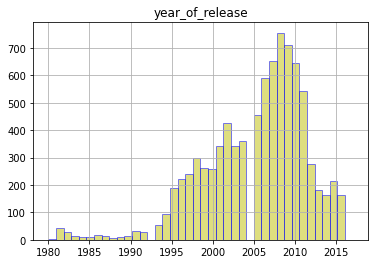

In [22]:
games_data.pivot_table(index='name', values='year_of_release', aggfunc='sum'
                      ).hist(bins=40, range=(1980, 2017), ec='b', alpha = 0.5, color='y')

На гистограмме заметно, что активный рост релизов начинается в 1995 году. 
1990-е годы были ознаменованы заметными инновациями в компьютерных играх. Основными достижениями называют переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реальном времени и MMO.
Резкий подъем продаж компьютерных игр наблюдается в 2001 году, пик в 2008-2009 годы, далее виден резкий спад в 2012 году. В целом мы можем использовать данные с 2001 года для анализа общих тенденций и поведения покупателей на рынке, для нас эта информация более актуальна.

Посмотрим в процентном соотношении релизы по годам:

In [23]:
games_data['year_of_release'].value_counts(normalize=True).to_frame()

,year_of_release
2008,0.086779
2009,0.086719
2010,0.076320
2007,0.072793
2011,0.069083
2006,0.061177
2005,0.057103
2002,0.050414
2003,0.047130
2004,0.046339


Согласно таблице больше всего релизов было в 2008-2010 годах. Далее идут все «двухтысячные». Также можно сделать вывод, что для анализа можно использовать данные начиная с 2001 года, данные остальных лет не так важны. 

#### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы.

Создадим таблицу, в которой мы посмотрим платформы с наибольшими суммарными продажами в целом. Также сделаем график по этой таблице.

In [24]:
platform_sales = games_data.groupby('platform'
                                   )['total_sales'].sum().sort_values(ascending=False).reset_index()

In [25]:
platform_sales

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


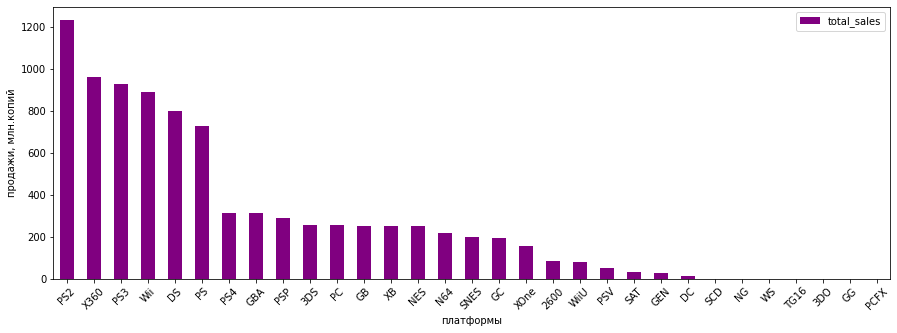

In [26]:
platform_sales.plot(x='platform', y='total_sales', kind='bar', figsize=(15, 5), rot=45, color='purple')
plt.ylabel('продажи, млн.копий')
plt.xlabel('платформы')
plt.show()

Лидеры заметны сразу - в первой шестёрке продаж PS2, X360, PS3, Wii, DS(Nintendo DS), PS. Посмотрим распределение продаж по этим платформам по годам:

In [27]:
platforms_variable = platform_sales['platform'][:6]
top_platforms = games_data.query('platform.isin(@platforms_variable)').pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum')

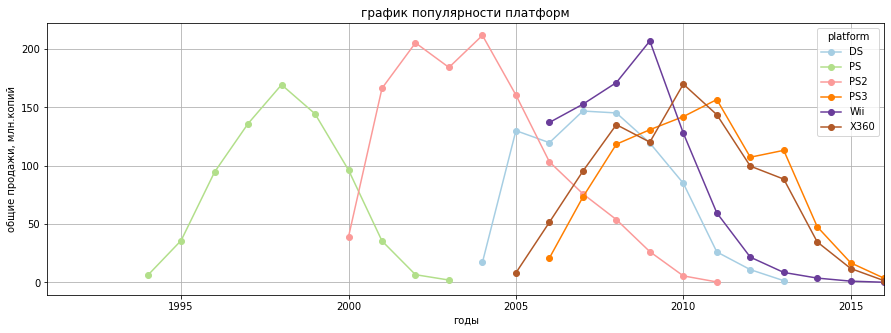

In [28]:
top_platforms.plot(grid=True, figsize=(15, 5), style ='o-', colormap = 'Paired')
plt.xlim(1991, 2016)
plt.title('график популярности платформ')
plt.ylabel('общие продажи, млн.копий')
plt.xlabel('годы')
plt.show()

По графику можно отследить популярность каждой из представленных топ-платформ.
* **PS**. Первая модель игровой приставки была выпущена в декабре 1994 года в Японии и получила огромную популярность за первые 5 лет. На графике можно заметить примерный период популярности данной консоли, также виден спад с релизом обновленной версии - PS2. 
* **PS2**. Преемница PS, стала наиболее быстро продаваемой и самой популярной игровой консолью в истории. Также можно видеть, что консоль очень быстро приобрела популярность среди геймеров, но виден спад с выпуском обновленной PS3 и релизом остальных консолей топ-шестёрки. 
* **DS**. Nintendo DS - это портативная игровая консоль, была выпущена в 2004 году в Японии и также заметно, что очень нравилась покупателям на протяжении четырех лет, далее наблюдается спад
* **X360**. Вторая по счёту игровая приставка компании Microsoft, которая последовала за Xbox. Также была достаточно популярна, очень большая конкуренция была с PS3, это отчетливо видно на графиках
* **PS3**. Третья версия PS, основное отличие в том, что с помощью этой консоли можно было еще работать с мультимедиа. 
* **Wii**. Является прямым конкурентом Microsoft Xbox 360 и Sony PlayStation 3. Также пользовалась огромной популярностью благодаря уникальным беспроводным контроллерам Wii Remote и Wii MotionPlus, реагирующим на движения игрока. 

Обобщив, можно сделать вывод, что характерный срок популярности всех консолей, составляет около 10 лет, PS3, как самой популярной консоли за всю историю на сегодняшний день, около 13 лет. 

#### Определение актуального периода для прогноза на 2017 год. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Актуальный период мы будем определять самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. 

Исходя из результатов исследования прошлых вопросов можно увидеть, что 2010 год затрагивает много разных изменений в судьбе разных платформ, пик популярности PS3 и X360, также спад Wii, DS и PS2. Актуальным периодом обозначим данные за последние 3 года — с 2013 по 2016, в 2013 году были релизы PS4 и XOne, данные за предыдущие годы учитывать не будем. 

In [62]:
actual_data = games_data.query('year_of_release >= 2013').reset_index(drop=True)

In [63]:
len(actual_data) / len(games_data)

0.135794210654342

В нашу выборку актуального периода попали 13,5% общего объема данных датасета, поэтому мы можем с ними поработать. 

Построим график количества проданных копий по всем платформам ежегодно за актуальный период:

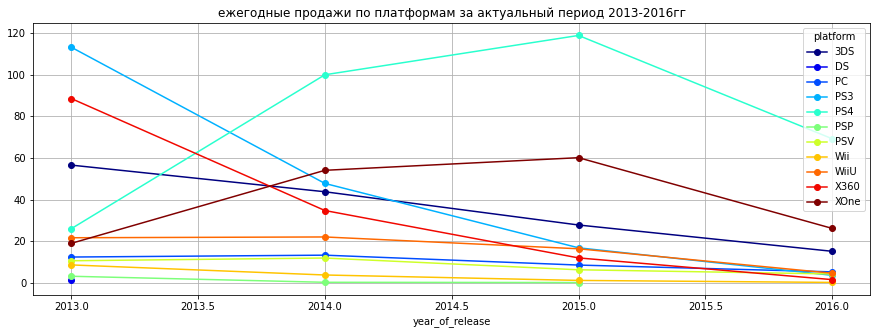

In [84]:
actual_data.pivot_table(index='year_of_release', 
                        columns='platform', 
                        values='total_sales', 
                        aggfunc='sum').plot(grid=True, figsize=(15, 5), style ='o-', colormap = 'jet')
plt.title('ежегодные продажи по платформам за актуальный период 2013-2016гг')
plt.show()

Можно видеть в топе продаж сначала PS3, X360, но с приходом PS4 и XOne – год релиза один и тот же, – предыдущие платформы теряют актуальность в пользу вновь прибывших. Можно сделать вывод, что в последние годы (с 2013 по 2016 год) очень популярны PS4 и XOne. Пик популярности приходится на 2015 год, также наблюдается стойкое снижение спроса на консоли PS3 и X360.

Посмотрим какие платформы лидируют по общим продажам относительно актуального периода:

In [32]:
platform_actual = actual_data.groupby('platform'
                                     )['total_sales'].sum().sort_values(ascending=False).reset_index()

In [33]:
platform_actual

,platform,total_sales
0,PS3,587.74
1,X360,550.41
2,PS4,314.14
3,3DS,257.81
4,Wii,222.97
5,XOne,159.32
6,DS,123.75
7,PC,121.96
8,WiiU,82.19
9,PSP,64.05


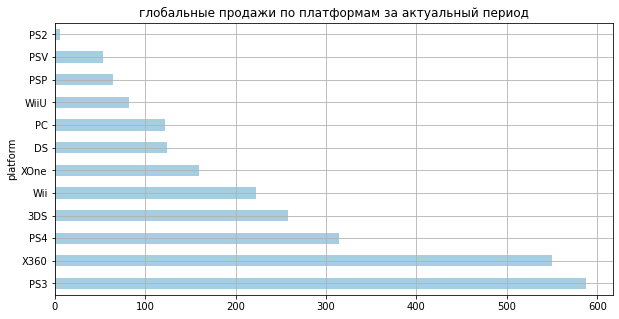

In [112]:
platform_actual.plot(kind='barh', 
                     x='platform',
                     y='total_sales',
                     grid=True,
                     figsize=(10, 5),
                     colormap='Paired',
                     legend=False)
plt.title('глобальные продажи по платформам за актуальный период')
plt.xlabel=('платформа') 
plt.ylabel=('продажи, млн.копий')
plt.show()

Мы видим, что за последние 6 лет в топе продаж PS3 и X360. Далее идёт PS4 - третье место - отличный результат, учитывая, что консоль появилась в продаже в 2013 году. Далее Nintendo 3DS, Wii, XOne. В топ пятерке после явных лидеров платформ релизов предыдущих лет стоят более свежие платформы от Sony и Microsoft - PS4 и XOne. Они являются потенциально прибыльными консолями, т.к. их предшественники пользуются огромной популярностью. 

#### Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам за актуальный период.

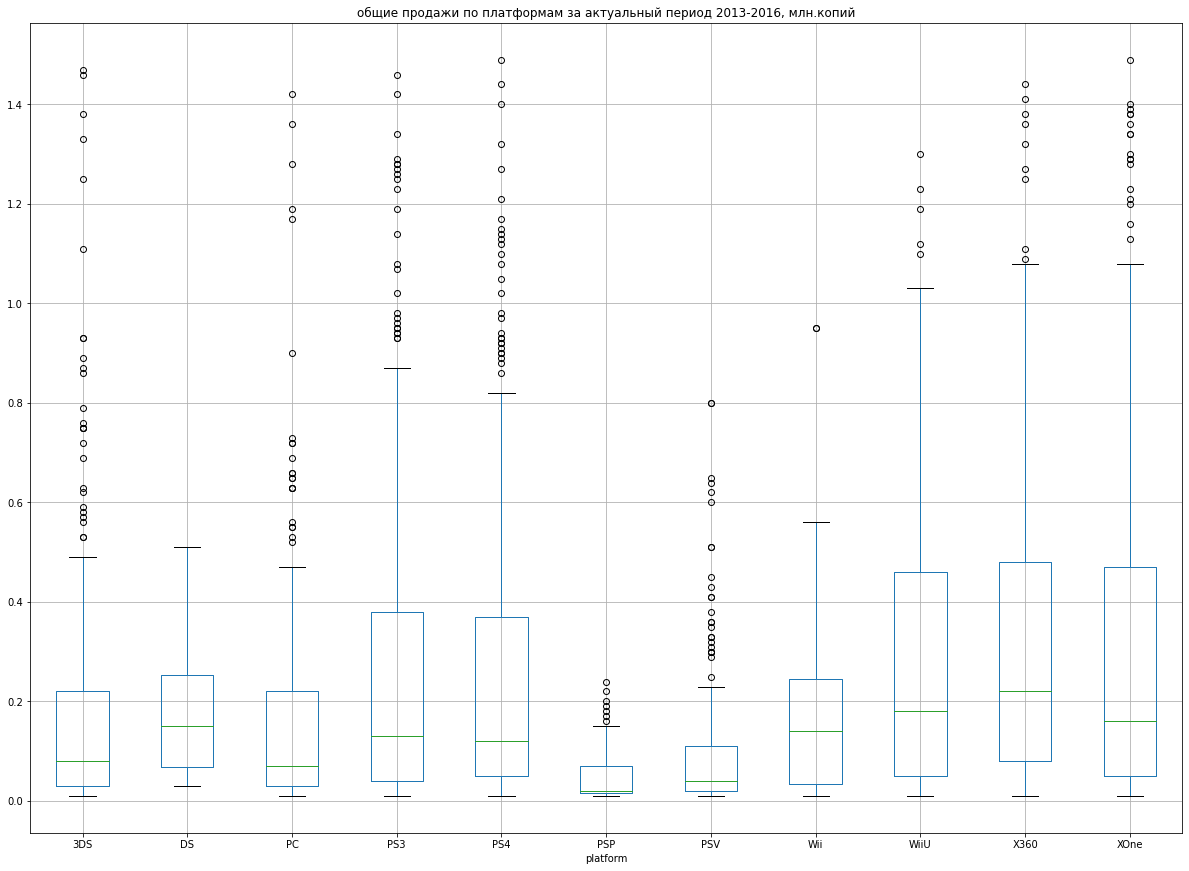

In [90]:
actual_data.query('total_sales < 1.5').boxplot(
    column='total_sales', 
    by='platform',
    figsize=(20,15),
    patch_artist=False)
plt.suptitle('')
plt.title('общие продажи по платформам за актуальный период 2013-2016, млн.копий')
plt.show()

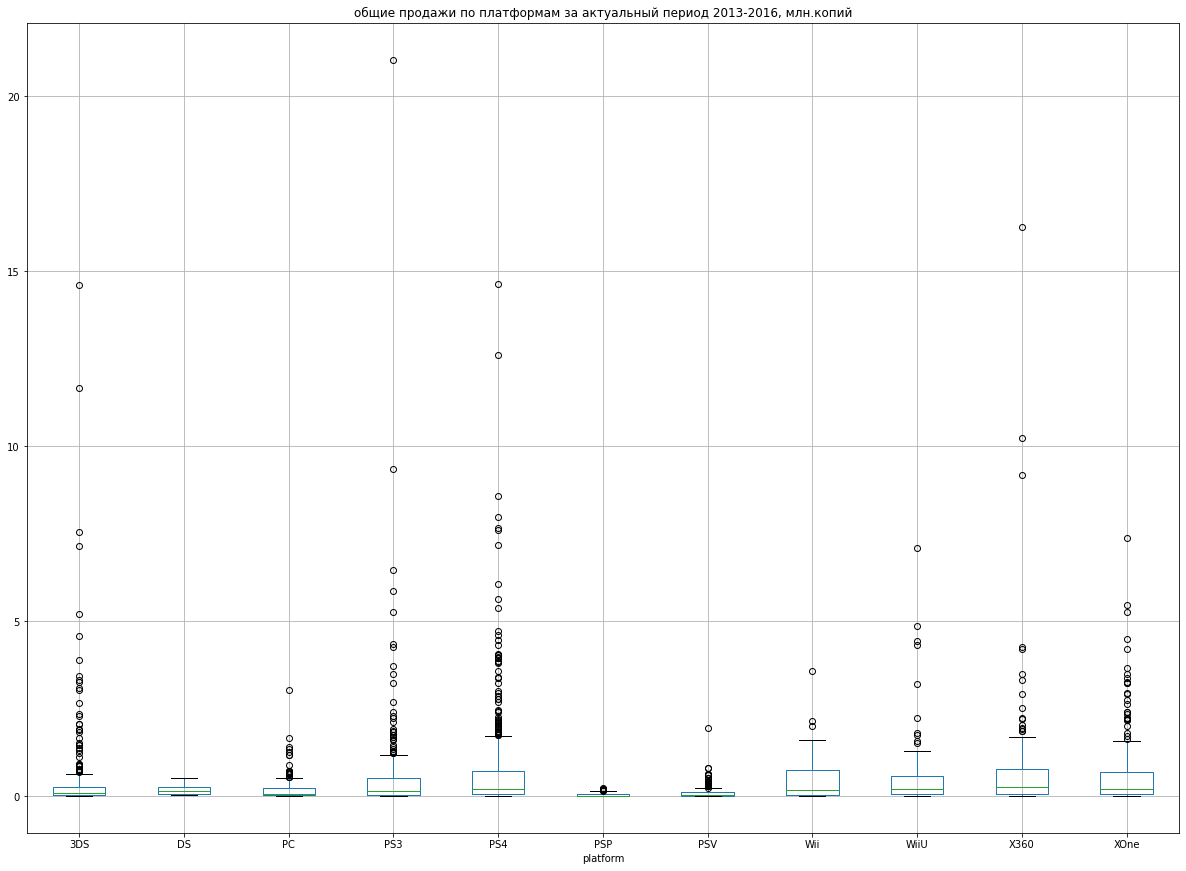

In [91]:
actual_data.boxplot(
    column='total_sales', 
    by='platform',
    figsize=(20,15),
    patch_artist=False)
plt.suptitle('')
plt.title('общие продажи по платформам за актуальный период 2013-2016, млн.копий')
plt.show()

В наших диаграммах можно видеть лидеров продаж: PS3 и PS4, X360 и XOne, WiiU. Четыре домашних приставки и одна портативная, 7-го и 8-го поколений, то есть, достаточно современные. 

У всех лидеров в ящиках кранится информация о том, что третий квартиль достаточно объемный, то есть пользователи глобально очень охотно тратят деньги на игры для любимых консолей. Причем у PS4 в сравнении со своей предшественницей межквартильный размах после третьего квартиля даже выше, то есть пользователи купили больше игр, это может быть связано с новыми релизами, так как сама консоль достаточно молодая, но также стоит отметить, что в то же время PS3 хорошо сохранила позиции относительно своего «возраста». Медианные значения примерно на одном уровне у всех.

Похожая ситуация у X360 и XOne. Обе консоли достаточно хорошо чувствуют себя на рынке, и X360 сохраняла хороший темп на момент релиза XOne, далее продажи пошли вниз.

У всех диаграмм имеются выбросы, мы не будем их убирать, т.к. у каждой консоли есть свои фанаты, которые следят за всеми новинками, люди, которые просто любят поиграть, компании, которые устраивают зоны отдыха для своих сотрудников или развлекательные центры. Там объемы покупок будут уже иные. Среднестатистические данные всё равно отлично дают понять, какие консоли самые прибыльные.

WiiU - преемница консоли Wii, очень популярной благодаря контроллерам Wii Remote и Wii MotionPlus, реагирующим на движения игрока. Это портативная консоль, которая стала более актуальной для поклонников Wii.

Создадим список топ-5 платформ и датасет с ними, чтобы использовать их в дальнейших исследованиях. Также сразу применим фильтрацию отсутствующих значений и чуть уменьшим объём выбросов для наглядности:

In [94]:
top_five_list = ['PS3','PS4','X360','XOne','WiiU']
top_five = actual_data[
    actual_data['platform'].isin(top_five_list)]
top_five = top_five.query(
    'critic_score != -1 and user_score != -1 and total_sales < 1.5').reset_index(drop=True)

In [95]:
top_five[:5]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Batman: Arkham Knight,XOne,2015,Action,0.88,0.47,0.00,0.14,85.0,6.6,M,1.49
1,NBA 2K14,PS4,2013,Sports,0.89,0.31,0.01,0.23,85.0,6.5,E,1.44
2,Disney Infinity,X360,2013,Action,0.97,0.34,0.00,0.13,74.0,6.5,E10+,1.44
3,Metal Gear Rising: Revengeance,PS3,2013,Action,0.45,0.37,0.44,0.16,80.0,7.9,M,1.42
4,Diablo III,X360,2013,Role-Playing,0.90,0.39,0.00,0.12,87.0,6.6,M,1.41


Теперь у нас есть отдельная переменная для работы с топ-5 консолей за актуальный период, мы будем использовать её при сравнении продаж по всем топ-платформам. 

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Рассмотрим, как влияют на продажи внутри популярной платформы PS4 отзывы пользователей и критиков.

Отфильтруем данные по платформе и сохраним в переменной `ps_four`:

In [97]:
ps_four = actual_data.query('platform == "PS4"').reset_index(drop=True)

In [98]:
ps_four

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no_rating,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
3,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,no_rating,7.98
4,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
387,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,no_rating,0.01
388,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01
389,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
390,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


In [99]:
len(ps_four) / len(actual_data)

0.1755485893416928

Почти 17% от всего количества релизов за актуальный период приходится на платформу PS4, с учетом, что консоль вышла в конце 2013 года. 

##### Посмотрим, как влияют на продажи отзывы пользователей:

Вспомним, что пропущенные значения мы заменяли на -1. Будем использовать данные, применяя фильтр. 

<AxesSubplot:title={'center':'PS3'}, xlabel='user_score', ylabel='total_sales'>

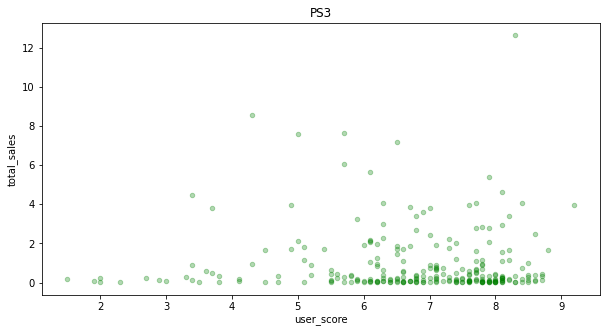

In [100]:
ps_four.query('user_score != -1').plot(x='user_score', 
              y='total_sales', 
              kind='scatter', 
              title='PS3', 
              alpha = 0.3, 
              figsize=(10, 5), 
              color='g')

Согласно нашей диаграмме рассеяния можно видеть, что нет явной корреляции с отзывами пользователей, но всё же есть покупатели, для которых высокая оценка достаточна важна для принятия решения, но таких людей меньшинство. Чтобы проверить свои выводы, посчитаем корреляцию с помощью функции, предварительно отфильтровав данные, в которых у нас не представлена оценка пользователей (равна -1):

In [101]:
ps_four[['user_score', 'total_sales']].query('user_score != -1').corr()

,user_score,total_sales
user_score,1.000000,-0.031957
total_sales,-0.031957,1.000000


Также можно видеть, линейной взаимосвязи между отзывами пользователей и продажами нет. 

##### Теперь оценим, как влияют на продажи оценки критиков:

<AxesSubplot:title={'center':'PS3'}, xlabel='critic_score', ylabel='total_sales'>

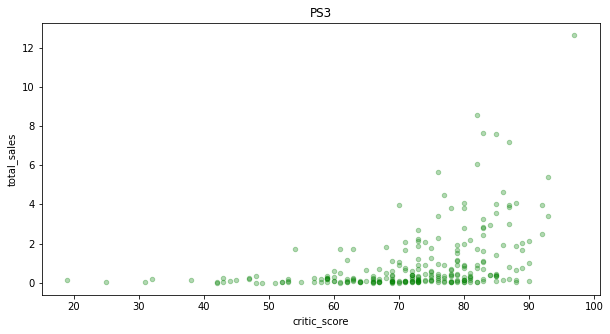

In [103]:
ps_four.query('critic_score != -1').plot(x='critic_score', 
              y='total_sales', 
              kind='scatter', 
              title='PS3', 
              alpha = 0.3, 
              figsize=(10, 5), 
              color='g')

Здесь на графике прослеживается зависимость от оценки критиков - корреляция более явная с оценками выше 70. Но яркой взаимосвязи между отзывами критиков и количеством проданных копий нет. Посчитаем с помощью формулы, чтобы удостовериться:

In [104]:
ps_four[['critic_score', 'total_sales']].query('critic_score != -1').corr()

,critic_score,total_sales
critic_score,1.000000,0.406568
total_sales,0.406568,1.000000


Мы видим, что взаимосвязь оценки критиков и общими продажами есть, когда критики ставят высокие оценки. Эти данные можно учесть при планировании прогноза на 2017 год, например, при планировании рекламных интеграций. 

#### Сопоставим выводы из предыдущего пункта с продажами игр на других платформах.

В предыдущих пунктах мы выделили топ-5 игр в актуальном для нас периоде: PS3 и PS4, X360 и XOne, WiiU. Посмотрим на корреляцию оценок и продаж с помощью графиков:

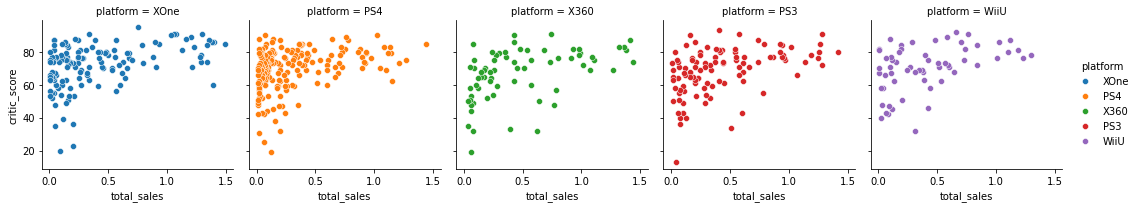

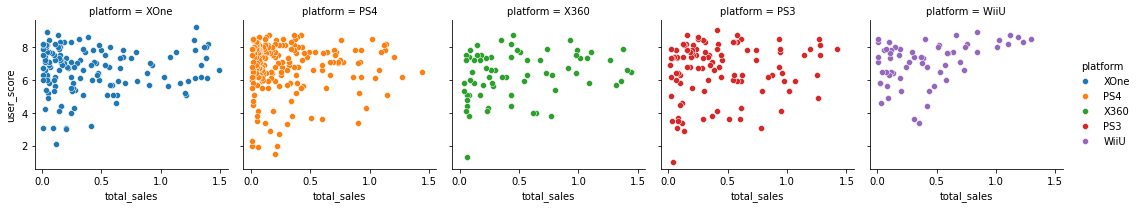

In [120]:
grid = sns.FacetGrid(top_five, col='platform', hue='platform', col_wrap=5) 
grid.map(sns.scatterplot, 'total_sales', 'critic_score') 
grid.add_legend()
grid = sns.FacetGrid(top_five, col='platform', hue='platform', col_wrap=5) 
grid.map(sns.scatterplot, 'total_sales', 'user_score') 
grid.add_legend()

Согласно графикам, ситуация относительно оценок идентична у всех консолей. Оценки критиков больше влияют на решение совершить покупку той или иной игры. Реже покупатели обращают внимание на пользователей, полагаясь на собственные вкусовые предпочтения. Исключение из правил - WiiU. У неё достаточно ощутимая линейная зависимость и от оценок критиков и от рейтингов пользователей.  

Посмотрим на платформы по отдельности и на общую корреляцию топ-5 платформ, сравним полученные показатели с показателями по PS3 (везде смотрим актуальный период 2010-2016). Не забываем отфильтровать пропущенные значения и выбросы. 

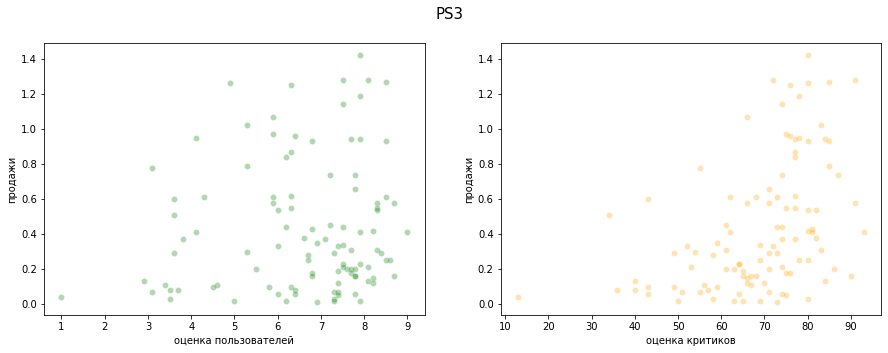

Корреляция между отзывами пользователей и продажами  PS3 : взаимосвязи скорее всего нет 0.09978182893039682
Корреляция между отзывами критиков и продажами  PS3 : умеренная 0.4413082884486507


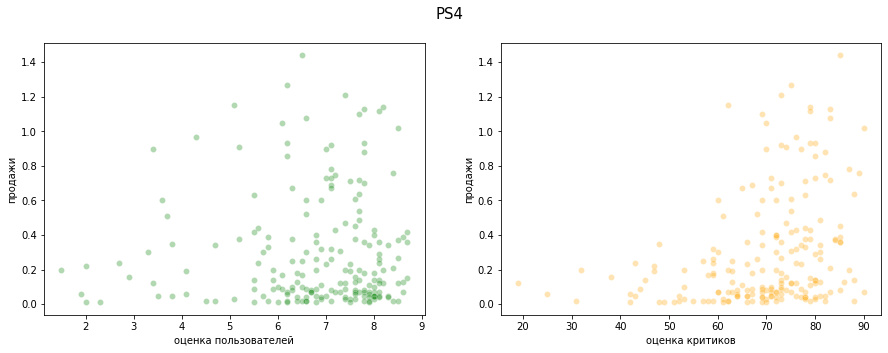

Корреляция между отзывами пользователей и продажами  PS4 : взаимосвязи скорее всего нет 0.02083039074517301
Корреляция между отзывами пользователей и продажами  PS4 : слабая 0.3226474395762677


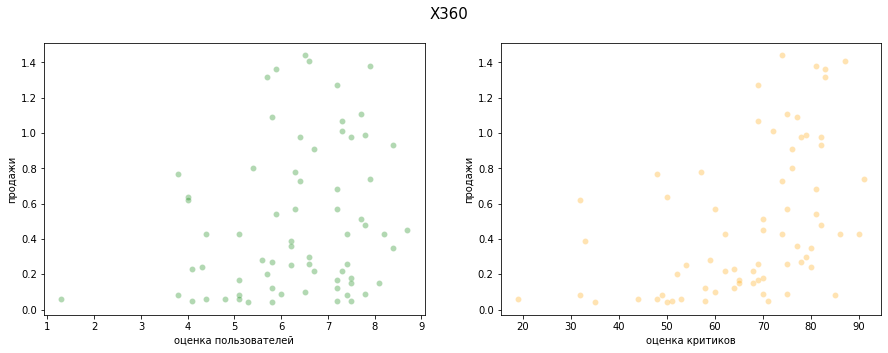

Корреляция между отзывами пользователей и продажами  X360 : взаимосвязи скорее всего нет 0.23104684765486935
Корреляция между отзывами критиков и продажами  X360 : умеренная 0.4583627502875643


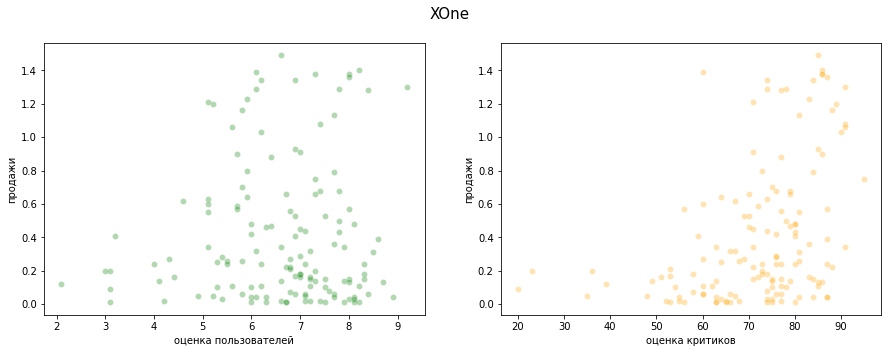

Корреляция между отзывами пользователей и продажами  XOne : взаимосвязи скорее всего нет 0.06429456092999752
Корреляция между отзывами критиков и продажами  XOne : умеренная 0.4148352121483222


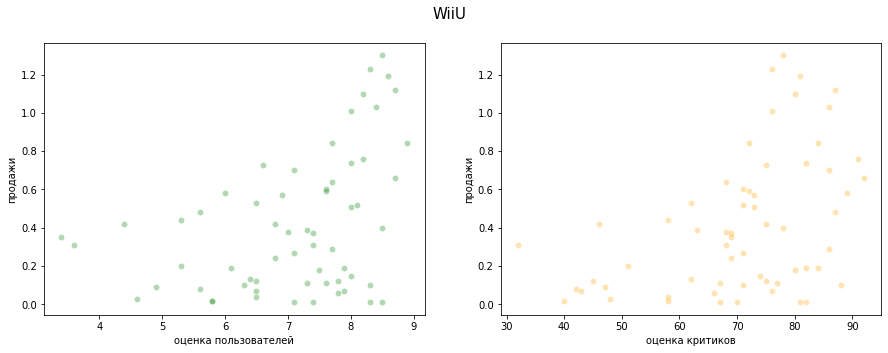

Корреляция между отзывами пользователей и продажами  WiiU : умеренная 0.40205280365037943
Корреляция между отзывами критиков и продажами  WiiU : умеренная 0.4398902783887819


In [107]:
actual_data_filter = actual_data.query('critic_score != -1 and user_score != -1 and total_sales < 1.5')

def other_platforms(platform_name):
    platform = actual_data_filter[actual_data_filter['platform'] == platform_name]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0], alpha=0.3, color='g')
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1], alpha=0.3, color='orange')
    fig.suptitle(platform_name, fontsize=15)
    ax[0].set(xlabel='оценка пользователей')
    ax[0].set(ylabel='продажи')
    ax[1].set(xlabel='оценка критиков')
    ax[1].set(ylabel='продажи')
    plt.show()
    
    user_corr = platform['user_score'].corr(platform['total_sales'])
    critic_corr = platform['critic_score'].corr(platform['total_sales'])
    
    if 0.01 <= user_corr <= 0.299:
        print('Корреляция между отзывами пользователей и продажами ', platform_name, ': взаимосвязи скорее всего нет', user_corr)
    if 0.3 <= user_corr <= 0.35:
        print('Корреляция между отзывами пользователей и продажами ', platform_name, ': слабая', user_corr)
    if 0.36 <= user_corr <= 0.799:
        print('Корреляция между отзывами пользователей и продажами ', platform_name, ': умеренная', user_corr)
    if 0.8 <= user_corr <= 1:
        print('Корреляция между отзывами пользователей и продажами ', platform_name, ': сильная', user_corr)
        
    if -0.01 >= user_corr >= -0.35:
        print('Корреляция между отзывами пользователей и продажами ', platform_name, ': корреляция не выявлена', user_corr)
    if -0.36 >= user_corr >= -0.799:
        print('Корреляция между отзывами пользователей и продажами ', platform_name, ': cлабая обратная', user_corr)
    if -0.8 >= user_corr >= -1:
        print('Корреляция между отзывами пользователей и продажами ', platform_name, ': умеренная обратная', user_corr)

    if 0.01 <= critic_corr <= 0.299:
        print('Корреляция между отзывами пользователей и продажами ', platform_name, ': взаимосвязи скорее всего нет', critic_corr)
    if 0.3 <= critic_corr <= 0.35:
        print('Корреляция между отзывами пользователей и продажами ', platform_name, ': слабая', critic_corr)
    if 0.36 <= critic_corr <= 0.799:
        print('Корреляция между отзывами критиков и продажами ', platform_name, ': умеренная', critic_corr)
    if 0.8 <= critic_corr <= 1:
        print('Корреляция между отзывами критиков и продажами ', platform_name, ': сильная', critic_corr)
        
    if -0.01 >= critic_corr >= -0.35:
        print('Корреляция между отзывами критиков и продажами ', platform_name, ': корреляция не выявлена', critic_corr)
    if -0.36 >= critic_corr >= -0.799:
        print('Корреляция между отзывами критиков и продажами ', platform_name, ': cлабая обратная', critic_corr)
    if -0.8 >= critic_corr >= -1:
        print('Корреляция между отзывами критиков и продажами ', platform_name, ': умеренная обратная', critic_corr)
        

        
for platform in top_five_list:
    other_platforms(platform)

In [105]:
def score_corr (actual_data, score):
    actual_data.plot(x=score, y='total_sales', kind='scatter', alpha=0.5, color='g')
    plt.show()
    print('корреляция:', actual_data[score].corr(games_data['total_sales']).round(2))

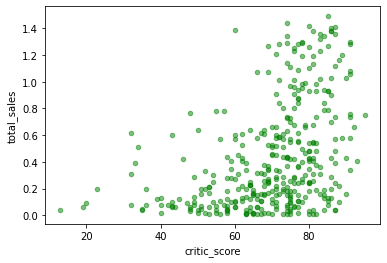

корреляция: 0.3


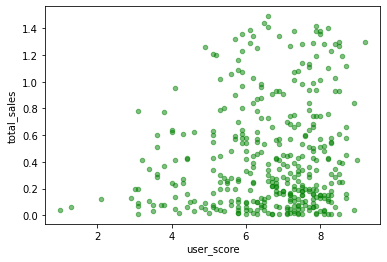

корреляция: 0.11


In [113]:
score_corr(top_five.query('platform!="PS4"'), 'critic_score')
score_corr(top_five.query('platform!="PS4"'), 'user_score')

В целом можно сделать вывод, что у топ-5 платформ наблюдается слабая корреляция между оценками критиков и продажами. А связь между оценками пользователей и продажами практически везде очень низкая либо отсуствует. Исключение составляет платформа WiiU, там пользователи прислушиваются к мнениям других игроков. Это интересное наблюдение, так как, помимио остальных особенностей, это единственная **портативная** консоль топе-5.

#### Посмотрим на общее распределение игр по жанрам - выделим самые прибыльные жанры и рассмотрим жанры с высокими и низкими продажами.

Рассмотрим общую тенденцию в актуальном периоде и по топ-5 и сравним их. Сделаем две сводные таблицы: 

In [114]:
actual_genre = actual_data.pivot_table(
    index='genre', values='total_sales').sort_values('total_sales', ascending=False)
actual_genre.set_axis(['sales_actual'], axis = 'columns', inplace = True)
top_five_genre = top_five.pivot_table(
    index='genre', values='total_sales').sort_values('total_sales', ascending=False)
top_five_genre.set_axis(['sales_top5'], axis = 'columns', inplace = True)

In [116]:
def display_together(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
display_together(actual_genre, top_five_genre)

,sales_actual
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


Довольно наглядное распределение. На первом месте в общей тенденции стоят шутеры, а у топ-5 спортивные игры

**Топ-5:** на втором месте шутеры, на консолях они очень популярны, дальше идут по убыванию файтинги, платформеры и misc(miscellaneous) - жанр не определен, туда могут входить любые жанры.

**Общие данные за актуальный период по всем платформам:** на втором месте стоят спортивные игры, далее платформеры, ролевые игры и гонки.

Исходя из этой информации можно спланировать как общие так и точечные изменения в продажах на 2017 год.

Ниже можно увидеть распределение прибыльности в виде графиков, для наглядности:

[Text(0.5, 0, 'жанр'), Text(0, 0.5, 'продажи')]

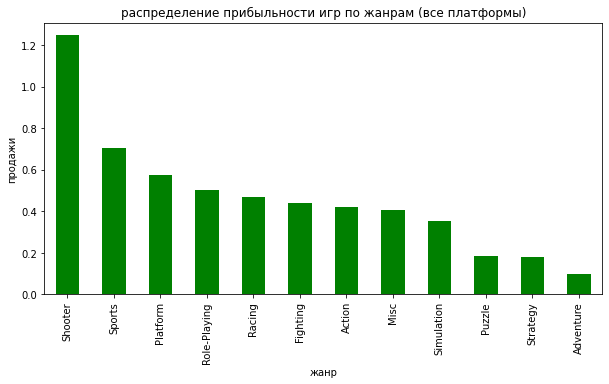

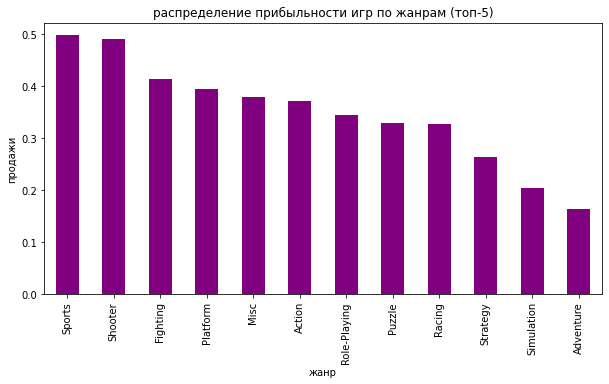

In [117]:
(actual_genre
 .plot(kind='bar', y='sales_actual', figsize=(10, 5), 
       legend=False, title = 'распределение прибыльности игр по жанрам (все платформы)', color='g')
 .set(xlabel='жанр', ylabel='продажи'))

(top_five_genre.plot(kind='bar', y='sales_top5', figsize=(10, 5), 
                     legend=False, title = 'распределение прибыльности игр по жанрам (топ-5)', color='purple')
 .set(xlabel='жанр', ylabel='продажи'))

Самую низкую прибыль приносят бродилки. Далее тоже есть различия по выборкам:

**Топ-5:** низкие продажи у симуляторов, стратегий и паззлов. Стоит обратить внимание, на игры жанров и их качество

**Общие данные за актуальный период по всем платформам:** низкие продажи у паззлов, стратегий и симуляторов - они не очень популярны у пользователей. Также возможно в играх этих жанров нет режима мультиплеер, что также важно, особенно в консолях последних поколений. 

Можно сделать вывод, что лидеры продаж в 2013-2016 годы – шутеры и спортивные игры. И стоит обратить внимание на отличия в топ-пятёрках общей тенденции и консолей-лидеров, чтобы скорректировать план продаж на 2017 год. 

### Портрет пользователей по каждому из регионов

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишем различия в долях продаж.
* Самые популярные жанры (топ-5). Поясним разницу.
* Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

Для удобства перечислим исследуемые регионы в списке:

In [52]:
regions_list = ['na_sales','eu_sales','jp_sales']
actual_data[regions_list].sum().to_frame()

,0
na_sales,1130.41
eu_sales,841.21
jp_sales,305.14


Можно сделать вывод, что лидер по продажам - Северная Америка. На втором месте Евросоюз, на третьем Япония. Рассмотрим более детально их отличия. 

#### Самые популярные платформы (топ-5) по регионам.

С помощью цикла и сводной таблицы плаформ по регионам построим графики, отражающие топ-5 доли продаж по консолям в каждом регионе.

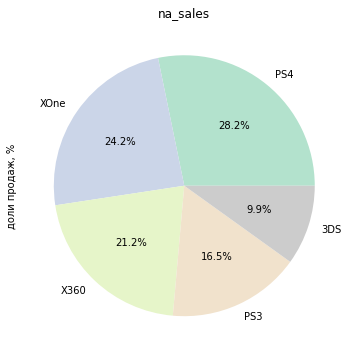

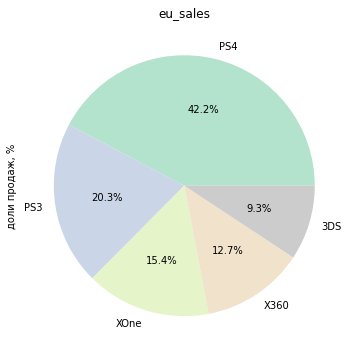

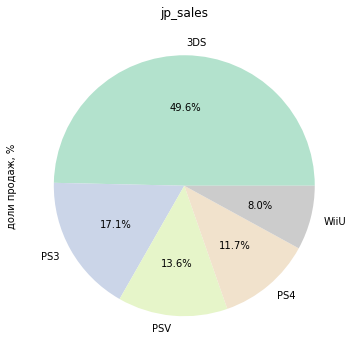

In [118]:
for region in regions_list:
    (actual_data.pivot_table(index='platform', values=region, aggfunc='sum')
     .sort_values(region, ascending=False)[:5]
     .plot(kind='pie', y=region, autopct='%.1f%%', figsize=(6, 6), legend=False, title = region, 
           colormap = 'Pastel2')
     .set(ylabel='доли продаж, %')
    )
    plt.show()

Опишем, что получилось на наших графиках:

1. **NA - North America.** В Северной Америке PS4 в лидерах по продажам, пользователи предпочитают SONY, - 28,2%. XOne на втором месте - 24,2%. На третьем месте X360 - 21,2%, хороший результат, учитывая приставки, с которыми она конкурирует. На 4 месте PS3 - 16,5%, на пятом Nintendo 3DS - 9,9% - единственная портативная консоль в топе. 

2. **EU - European Union.** В Евросоюзе на первом месте PS4 - 42,2% от общих продаж топ-5. В  На втором месте PS3 - 20,3%. На третьем месте XOne - 15,4%, пользователи в Евросоюзе отдают предпочтение приставкам от SONY. 4 и 5 место между собой делят X360 и Nintendo 3DS соответственно - 12,7% у X360 и 9,3% у Nintendo 3DS.

3. **JP - Japan.** В Японии ситуация немного иная. В лидерах продаж игры на Nintendo 3DS - 49,6%. Это портативная консоль, японцы очень любят ностальгию и своё прошлое, и стилистика Nintendo этим подкупает. Несмотря на это, на втором месте PS3 - 17,1%. На 3 ещё одна портативная консоль - PSV - 13,6%. На 4 месте PS4 - 11,7%. На 5 месте WiiU - 8%. Это тоже портативная консоль. 

Исходя из наших наблюдений можно сделать вывод, что покупатели Европы и Северной Америки предпочитают популярные стационарные консоли, когда как в Японии явно предпочитают портативные игровые приставки. 

#### Самые популярные жанры (топ-5) по регионам. 

С помощью цикла и сводной таблицы жанров по регионам построим графики, отражающие топ-5 доли продаж по жанрам в каждом регионе.

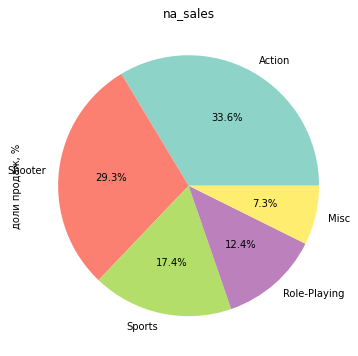

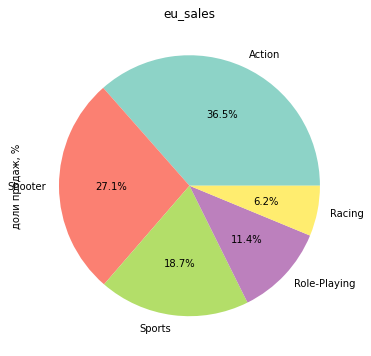

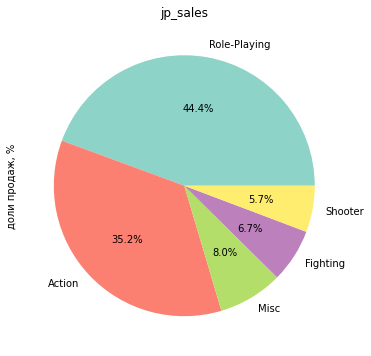

In [119]:
for region in regions_list:
    (actual_data.pivot_table(index='genre', values=region, aggfunc='sum')
                .sort_values(region, ascending=False)[:5]
                .plot(kind='pie', y=region, autopct='%.1f%%', figsize=(6, 6), legend=False, title = region,
                     colormap = 'Set3')
                .set(ylabel='доли продаж, %')
    )
    plt.show()

Опишем, что показывают нам графики. 

1. **NA - North America.** В лидерах продаж игры жанра экшн (боевики, по аналогии с фильмами) - 33,6% игр топ-5 жанров. Далее следуют игры жанра шутер («стрелялки») - 29,3%. На третьем месте игры спортивного жанра - 17,4% - FIFA и т.п. На четвёртом месте ролевые игры - 12,4%, туда могут входить совершенно разнообразные игры, иногда бывает сложно отнести игру, имеющую множество критериев, к определённому жанру. На последнем месте идут игры смешанных жанров - 7,3%. 

2. **EU - European Union.** Предпочтения европейцев в целом схожи с предпочтениями американцев. На первом месте экшн-игры - 36,5%. На втором - шутеры - 27,1%, доля игр этого жанра у американцев и европейцев одинаковая. Третье место - спортивные игры - 18,7%, четвёртое - ролевые игры - 11,4%. На пятом месте - гонки - их доля 6,2%. В целом распределение долей у топ-игр Америки и Европы слабо отличается, вкусы пользователей схожи. 

3. **JP - Japan.** У пользователей в Японии картина немного иная. На первом месте ролевые игры - всевозможные RPG и также MOBA, 44,4% - достаточно объемная доля жанров топ-5. На втором - экшн - 35,2%. На третьем месте игры смешнанных жанров - 8%, на четвёртом месте файтинги - 6,7% и на пятом месте шутеры - 5,7%. 

Можно сделать вывод, что вкусы японских геймеров очень сильно отличаются от вкусов европейцев и американцев. Эти отличия обязательно нужно учитывать при прогнозировании продаж на 2017 год.

#### Посмотрим, влияет ли рейтинг ESRB на продажи по регионам. 

С помощью цикла и сводной таблицы рейтинга ESRB по регионам построим графики, отражающие топ-5 доли продаж по рейтингу в каждом регионе.

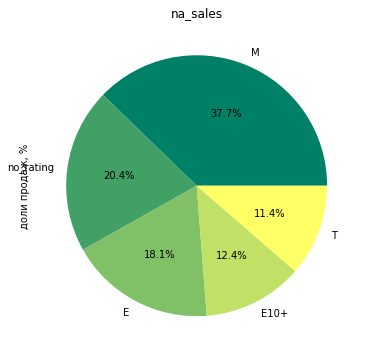

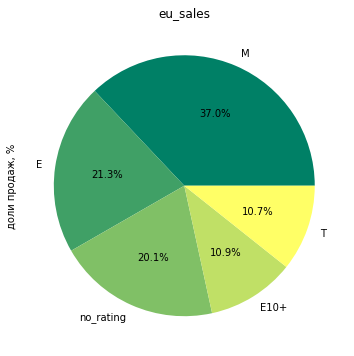

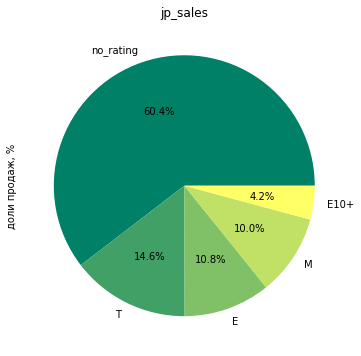

In [111]:
for region in regions_list:
    (actual_data.pivot_table(index='rating', values=region, aggfunc='sum')
                .sort_values(region, ascending=False)[:5]
                .plot(kind='pie', y=region, autopct='%.1f%%', figsize=(6, 6), legend=False, title = region,
                     colormap = 'summer')
                .set(ylabel='доли продаж, %')
    )
    plt.show()

Опишем графики. Для понимания обозначений будем пользоваться расшифровкой ESRB из Википедии. 

1. **NA - North America.** 

* 37,7% - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
* 20,4% - Игры без рейтинга.
* 18,1% - «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. 
* 12,4% - E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. 
* 11,4% - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. 

2. **EU - European Union.** 

* 37% - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
* 21,3% - «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. 
* 20,1% - Игры без рейтинга. 
* 10,9% - E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
* 10,7% - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.


3. **JP - Japan.** 

* 60,4% - Игры без рейтинга. 
* 14,6% - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
* 10,8% - «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. 
* 10% - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
* 4,2% - E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. 

Предпочтения европейцев и американцев игр соответствующих рейтингов очень схожи, а японские пользователи немного иначе подходят к выбору. Можно предположить, что игры из категории no_rating разрешены для всех возрастов. И также можно сделать вывод, что рейтинг ESRB влияет на продажи в NA и EU, в JP же рейтинг ESRB не имеет существенного влияния, на первом месте в топе игры без рейтинга с долей в 60,4%. 

### Проверка гипотез

Проверим две гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Пороговое значение alpha = 0.05

Также поясним:
* Как сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

#### Проверим первую гипотезу - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую и альтернативную гипотезы. 

- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- H1: Средние пользовательские рейтинги платформ Xbox One и PC разные.

Нулевая гипотеза предполагает отсутсвие различий в рейтингах пользователей между платформами XOne и PC. Альтернативная гипотеза предполагает, что различия всё таки есть - нас интересует сам факт различий, без акцента на уменьшении или увеличении. 

У нас будет две выборки из одной совокупности, поэтому мы будем использовать метод `st.ttest_ind` и проверим, равны ли дисперсии. Для начала отфильтруем нужные нам значения в выборки и сохраним их в переменные:

In [56]:
xone_test = actual_data.query('platform == "XOne" and user_score != -1')['user_score'].values
pc_test = actual_data.query('platform == "PC" and user_score != -1')['user_score'].values

Проверим равенство или неравенство дисперсий:

In [57]:
np.var(xone_test), np.var(pc_test)

(1.8965188383045526, 2.4438940204180843)

Дисперсии не равны, это условие мы укажем при проверке наших гипотез.

In [58]:
alpha = .05
results = st.ttest_ind(xone_test, pc_test, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha): 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9801634129117883
Не получилось отвергнуть нулевую гипотезу


Исходя из результата эксперимента, можно сделать вывод, что рейтинги не различаются.
Таким образом, средние пользовательские рейтинги платформ Xbox One и PC одинаковые – наша гипотеза подтвердилась.

#### Проверим вторую гипотезу - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

Сформулируем нулевую и альтернативную гипотезы.

- H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
- H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза – это основное проверяемое предположение, которое обычно формулируется как отсутствие различий, поэтому H0 утверждает, что между рейтингами различий нет. 

Как и при предыдущей проверке, у нас будут две выборки из одной совокупности, поэтому мы будем использовать метод `st.ttest_ind` и проверим, равны ли дисперсии. Для начала отфильтруем нужные нам значения в выборки и сохраним их в переменные:

In [59]:
action_test = actual_data.query('genre == "Action" and user_score != -1')['user_score'].values
sports_test = actual_data.query('genre == "Sports" and user_score != -1')['user_score'].values

Проверим равенство или неравенство дисперсий:

In [60]:
np.var(action_test), np.var(sports_test)

(1.847772513722705, 2.826632401108592)

Дисперсии не равны, это условие мы укажем при проверке наших гипотез.

In [61]:
alpha = .05
results = st.ttest_ind(action_test, sports_test, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha): 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4516152467844418e-15
Отвергаем нулевую гипотезу


Согласно результату в -15 степени можно сказать, что рейтинги по жанрам экшн и спорт различаются. Следовательно, средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные – наша гипотеза подтвердилась.

### Общий вывод

В данном исследовании были проанализированы доступные исторические данные  из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мы выявляли определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**1. В процессе предобработки данных были сделаны следующие изменения:**

- Приведение к нижнему регистру названия столбцов датасета;
- Были обработаны пропуски в столбцах в нескольких столбцах: `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`, значения заменены на подходящие и удобные для расчетов и фильтрации;
- Заменены типы данных в столбцах `year_of_release` и `user_score` на более удобные для расчетов;
- Добавлен столбец с суммарными продажи во всех регионах `total_sales`.

**2. В ходе исследовательского анализа данных:**

**- Посмотрели, сколько игр выпускалось в разные годы и важны ли данные за все периоды:**

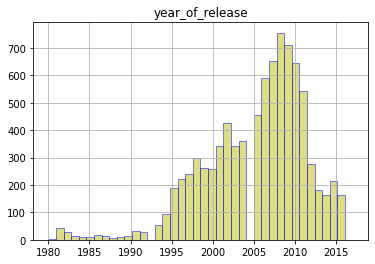
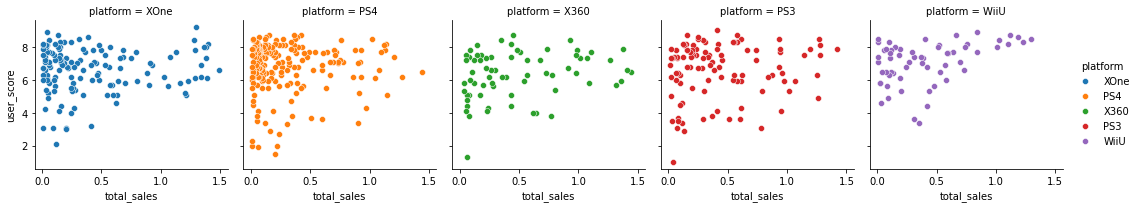

На гистограмме заметно, что активный рост релизов начинается в 1995 году. 1990-е годы были ознаменованы заметными инновациями в компьютерных играх. Основными достижениями называют переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реальном времени и MMO. Резкий подъем продаж компьютерных игр наблюдается в 2001 году, пик в 2008-2009 годы, далее виден резкий спад в 2012 году. В целом мы можем использовать данные с 2001 года для анализа общих тенденций и поведения покупателей на рынке, для нас эта информация более актуальна. 

Больше всего релизов было в 2008-2010 годах. Далее идут все «двухтысячные». Также можно сделать вывод, что для анализа можно использовать данные начиная с 2001 года, данные остальных лет не так важны.

**- Посмотрели, как менялись продажи по платформам:**

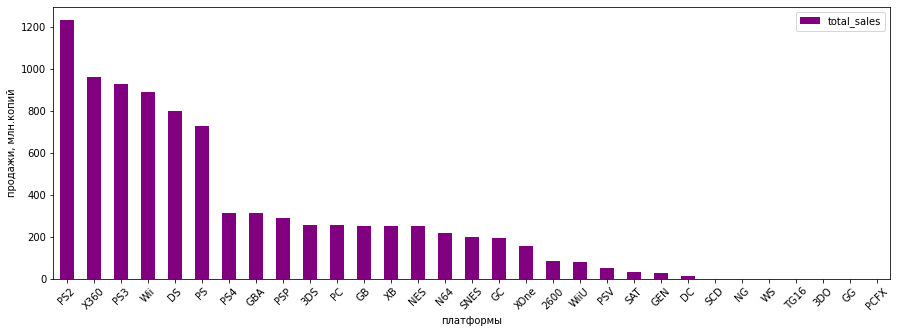

Лидеры заметны сразу - в первой шестёрке продаж PS2, X360, PS3, Wii, DS(Nintendo DS), PS. Посмотрим распределение продаж по этим платформам по годам:

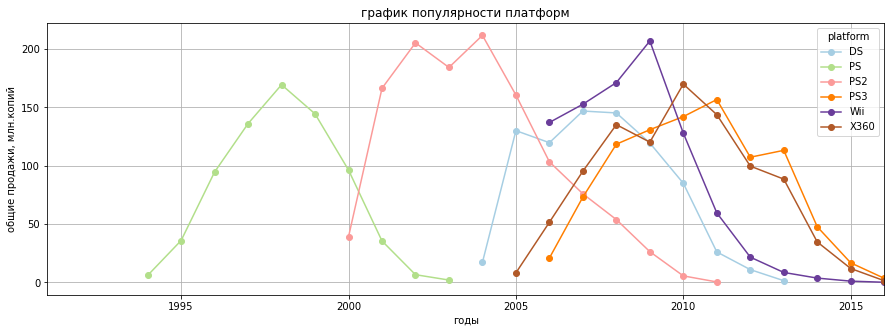

По графику можно отследить популярность каждой из представленных топ-платформ.

PS. Первая модель игровой приставки была выпущена в декабре 1994 года в Японии и получила огромную популярность за первые 5 лет. На графике можно заметить примерный период популярности данной консоли, также виден спад с релизом обновленной версии - PS2.
PS2. Преемница PS, стала наиболее быстро продаваемой и самой популярной игровой консолью в истории. Также можно видеть, что консоль очень быстро приобрела популярность среди геймеров, но виден спад с выпуском обновленной PS3 и релизом остальных консолей топ-шестёрки.
DS. Nintendo DS - это портативная игровая консоль, была выпущена в 2004 году в Японии и также заметно, что очень нравилась покупателям на протяжении четырех лет, далее наблюдается спад
X360. Вторая по счёту игровая приставка компании Microsoft, которая последовала за Xbox. Также была достаточно популярна, очень большая конкуренция была с PS3, это отчетливо видно на графиках
PS3. Третья версия PS, основное отличие в том, что с помощью этой консоли можно было еще работать с мультимедиа.
Wii. Является прямым конкурентом Microsoft Xbox 360 и Sony PlayStation 3. Также пользовалась огромной популярностью благодаря уникальным беспроводным контроллерам Wii Remote и Wii MotionPlus, реагирующим на движения игрока.
Обобщив, можно сделать вывод, что характерный срок популярности всех консолей, составляет около 10 лет, PS3, как самой популярной консоли за всю историю на сегодняшний день, около 13 лет.

**- Определили актуальный период для прогноза на 2017 год:**

Исходя из результатов исследования прошлых вопросов можно увидеть, что 2010 год затрагивает много разных изменений в судьбе разных платформ, пик популярности PS3 и X360, также спад Wii, DS и PS2. Актуальным периодом обозначим данные за последние 6 лет — с 2013 по 2016, в 2013 году были релизы PS4 и XOne, данные за предыдущие годы учитывать не будем.

В топе продаж сначала PS3, X360, но с приходом PS4 и XOne – год релиза один и тот же, – предыдущие платформы теряют актуальность в пользу вновь прибывших. Можно сделать вывод, что в последние годы (с 2013 по 2016 год) очень популярны PS4 и XOne. Пик популярности приходится на 2015 год, также наблюдается стойкое снижение спроса на консоли PS3 и X360.

**- Построили диаграмму размаха по глобальным продажам игр в разбивке по платформам за актуальный период:**

У всех лидеров в ящиках кранится информация о том, что третий квартиль достаточно объемный, то есть пользователи глобально очень охотно тратят деньги на игры для любимых консолей. Причем у PS4 в сравнении со своей предшественницей межквартильный размах после третьего квартиля даже выше, то есть пользователи купили больше игр, это может быть связано с новыми релизами, так как сама консоль достаточно молодая, но также стоит отметить, что в то же время PS3 хорошо сохранила позиции относительно своего «возраста». Медианные значения примерно на одном уровне у всех.

Похожая ситуация у X360 и XOne. Обе консоли достаточно хорошо чувствуют себя на рынке, но X360 сохраняет хороший темп. У всех диаграмм имеются выбросы, мы не будем их убирать, т.к. у каждой консоли есть свои фанаты, которые следят за всеми новинками, люди, которые просто любят поиграть, компании, которые устраивают зоны отдыха для своих сотрудников или развлекательные центры. Там объемы покупок будут уже иные. Среднестатистические данные всё равно отлично дают понять, какие консоли самые прибыльные.

WiiU - преемница консоли Wii, очень популярной благодаря контроллерам Wii Remote и Wii MotionPlus, реагирующим на движения игрока. Это портативная консоль, которая стала более актуальной для поклонников Wii.

**- Посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами:**

Почти 17% от всего количества релизов за актуальный период приходится на платформу PS4, с учетом, что консоль вышла в конце 2013 года. 

Нет явной корреляции с отзывами пользователей, но всё же есть покупатели, для которых высокая оценка достаточна важна для принятия решения, но таких людей меньшинство. Взаимосвязи между оценками пользователей и продажами нет. 

Прослеживается зависимость от оценки критиков - корреляция более явная с оценками выше 70. Но яркой взаимосвязи между отзывами критиков и количеством проданных копий нет. Мы видим, что взаимосвязь оценки критиков и общими продажами есть, когда критики ставят высокие оценки. Эти данные можно учесть при планировании прогноза на 2017 год, например, при планировании рекламных интеграций.

**- Сопоставили выводы из предыдущего пункта с продажами игр на других платформах:**

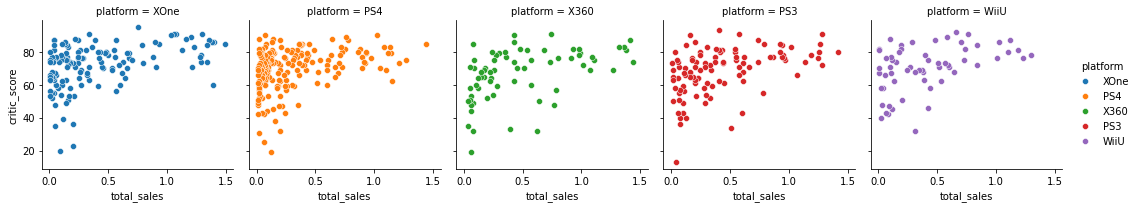
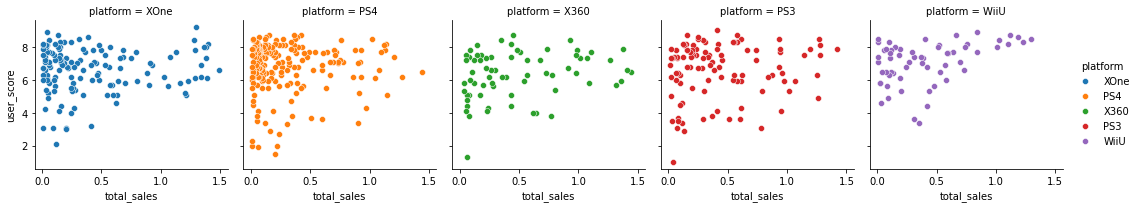

Согласно графикам, ситуация относительно оценок идентична у всех консолей. Оценки критиков больше влияют на решение совершить покупку той или иной игры. Реже покупатели обращают внимание на пользователей, полагаясь на собственные вкусовые предпочтения. Исключение из правил - WiiU. У неё достаточно ощутимая линейная зависимость и от оценок критиков и от рейтингов пользователей.

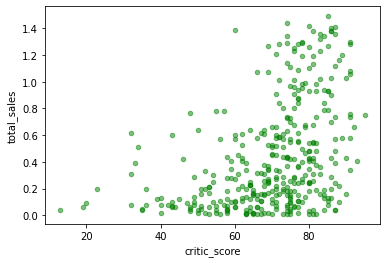
Корреляция между отзывами критиков и общими продажами всех платформ, кроме PS4: 0.03

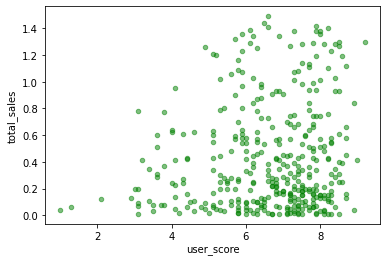
Корреляция между отзывами пользователей и общими продажами всех платформ, кроме PS4: 0.11

В целом можно сделать вывод, что у топ-5 платформ наблюдается слабая корреляция между оценками критиков и продажами. А связь между оценками пользователей и продажами практически везде очень низкая либо отсуствует. Исключение составляет платформа WiiU, там пользователи прислушиваются к мнениям других игроков. Это интересное наблюдение, так как, помимио остальных особенностей, это единственная портативная консоль топе-5.

**- Посмотрели на общее распределение игр по жанрам - выделили самые прибыльные жанры и рассмотрели жанры с высокими и низкими продажами:**

На первом месте в общей тенденции стоят шутеры, а у топ-5 спортивные игры

Топ-5: на втором месте шутеры, на консолях они очень популярны, дальше идут по убыванию файтинги, платформеры и misc(miscellaneous) - жанр не определен, туда могут входить любые жанры.

Общие данные за актуальный период по всем платформам: на втором месте стоят спортивные игры, далее платформеры, ролевые игры и гонки.

Исходя из этой информации можно спланировать как общие так и точечные изменения в продажах на 2017 год.

Самую низкую прибыль приносят бродилки. Далее тоже есть различия по выборкам:

Топ-5: низкие продажи у симуляторов, стратегий и паззлов. Стоит обратить внимание, на игры жанров и их качество

Общие данные за актуальный период по всем платформам: низкие продажи у паззлов, стратегий и симуляторов - они не очень популярны у пользователей. Также возможно в играх этих жанров нет режима мультиплеер, что также важно, особенно в консолях последних поколений.

Можно сделать вывод, что лидеры продаж в 2013-2016 годы – шутеры и спортивные игры. И стоит обратить внимание на отличия в топ-пятёрках общей тенденции и консолей-лидеров, чтобы скорректировать план продаж на 2017 год.

**3. Портрет пользователей по каждому из регионов:**

**- Самые популярные платформы (топ-5) по регионам:**

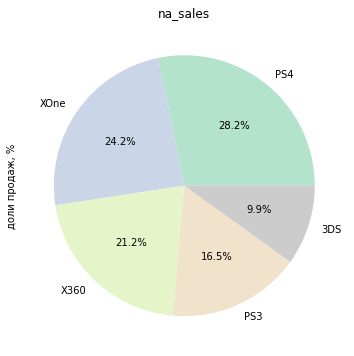
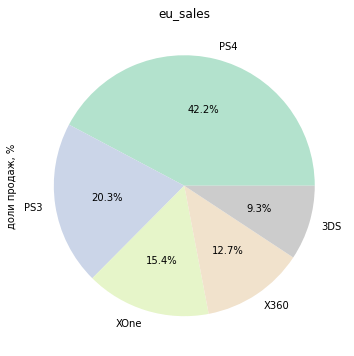
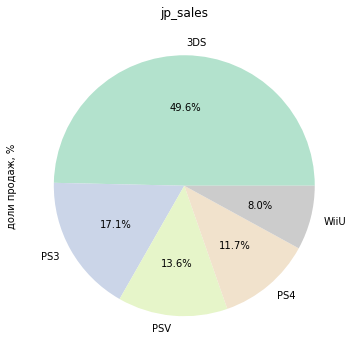

Опишем, что получилось на наших графиках:

**NA - North America.** В Северной Америке PS4 в лидерах по продажам, пользователи предпочитают SONY, - 28,2%. XOne на втором месте - 24,2%. На третьем месте X360 - 21,2%, хороший результат, учитывая приставки, с которыми она конкурирует. На 4 месте PS3 - 16,5%, на пятом Nintendo 3DS - 9,9% - единственная портативная консоль в топе. 

**EU - European Union.** В Евросоюзе на первом месте PS4 - 42,2% от общих продаж топ-5. В  На втором месте PS3 - 20,3%. На третьем месте XOne - 15,4%, пользователи в Евросоюзе отдают предпочтение приставкам от SONY. 4 и 5 место между собой делят X360 и Nintendo 3DS соответственно - 12,7% у X360 и 9,3% у Nintendo 3DS.

**JP - Japan.** В Японии ситуация немного иная. В лидерах продаж игры на Nintendo 3DS - 49,6%. Это портативная консоль, японцы очень любят ностальгию и своё прошлое, и стилистика Nintendo этим подкупает. Несмотря на это, на втором месте PS3 - 17,1%. На 3 ещё одна портативная консоль - PSV - 13,6%. На 4 месте PS4 - 11,7%. На 5 месте WiiU - 8%. Это тоже портативная консоль. 

Исходя из наших наблюдений можно сделать вывод, что покупатели Европы и Северной Америки предпочитают популярные стационарные консоли, когда как в Японии явно предпочитают портативные игровые приставки. 

**-Самые популярные жанры (топ-5) по регионам:**

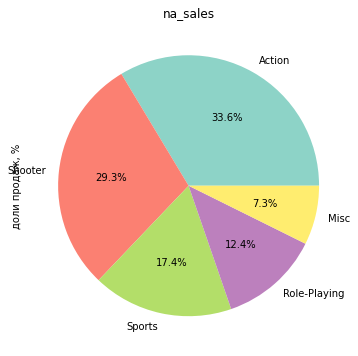
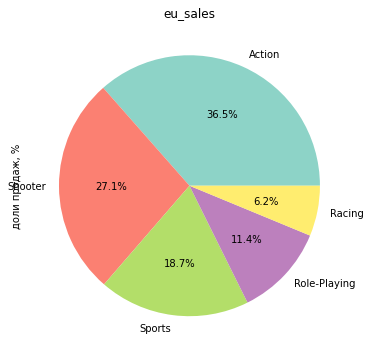
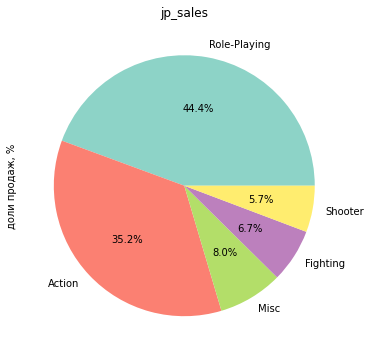

**NA - North America.** В лидерах продаж игры жанра экшн (боевики, по аналогии с фильмами) - 33,6% игр топ-5 жанров. Далее следуют игры жанра шутер («стрелялки») - 29,3%. На третьем месте игры спортивного жанра - 17,4% - FIFA и т.п. На четвёртом месте ролевые игры - 12,4%, туда могут входить совершенно разнообразные игры, иногда бывает сложно отнести игру, имеющую множество критериев, к определённому жанру. На последнем месте идут игры смешанных жанров - 7,3%. 

**EU - European Union.** Предпочтения европейцев в целом схожи с предпочтениями американцев. На первом месте экшн-игры - 36,5%. На втором - шутеры - 27,1%, доля игр этого жанра у американцев и европейцев одинаковая. Третье место - спортивные игры - 18,7%, четвёртое - ролевые игры - 11,4%. На пятом месте - гонки - их доля 6,2%. В целом распределение долей у топ-игр Америки и Европы слабо отличается, вкусы пользователей схожи. 

**JP - Japan.** У пользователей в Японии картина немного иная. На первом месте ролевые игры - всевозможные RPG и также MOBA, 44,4% - достаточно объемная доля жанров топ-5. На втором - экшн - 35,2%. На третьем месте игры смешнанных жанров - 8%, на четвёртом месте файтинги - 6,7% и на пятом месте шутеры - 5,7%. 

Можно сделать вывод, что вкусы японских геймеров очень сильно отличаются от вкусов европейцев и американцев. Эти отличия обязательно нужно учитывать при прогнозировании продаж на 2017 год.

**- Посмотрели, влияет ли рейтинг ESRB на продажи по регионам:**

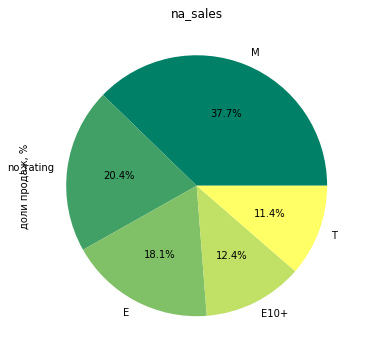
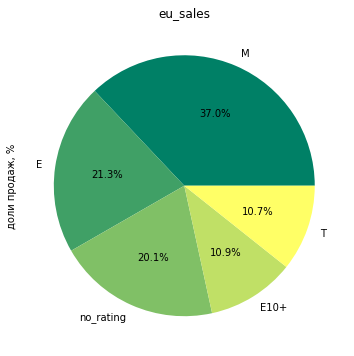
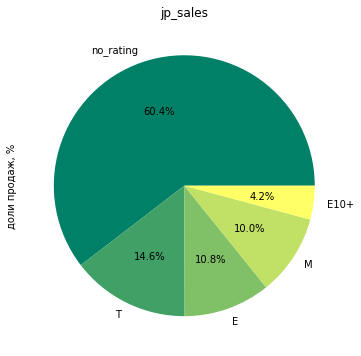

**NA - North America.** 

* 37,7% - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
* 20,4% - Игры без рейтинга.
* 18,1% - «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. 
* 12,4% - E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. 
* 11,4% - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. 

**EU - European Union.** 

* 37% - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
* 21,3% - «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. 
* 20,1% - Игры без рейтинга. 
* 10,9% - E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
* 10,7% - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.


**JP - Japan.** 

* 60,4% - Игры без рейтинга. 
* 14,6% - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
* 10,8% - «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. 
* 10% - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
* 4,2% - E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. 

Предпочтения европейцев и американцев игр соответствующих рейтингов очень схожи, а японские пользователи немного иначе подходят к выбору. Можно предположить, что игры из категории no_rating разрешены для всех возрастов. И также можно сделать вывод, что рейтинг ESRB влияет на продажи в NA и EU, в JP же рейтинг ESRB не имеет существенного влияния, на первом месте в топе игры без рейтинга с долей в 60,4%. 

Потенциально выгодные жанры игр для Европы и Америки на перспективных платформах Sony PlayStation 4 и Xbox One в жанре Shooter и Action. Японский рынок имеет свою специфику по платформам и жанрам, на которую также стоит обратить внимание.